# Fifty States & Bitcoin Friendliness: Spider Plots

## February 2023

In [4]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-white')
from math import pi
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

Previewing data!

In [5]:
# reading in csv file
states = pd.read_csv('FiftyStates.csv')
states.head(10)

,State,Money Transmitter Licensing,Electricity Prices,Financial Freedom,Proactive Positioning,Business Friendliness
0,Alabama,0,12.226667,19,3,25
1,Alaska,0,20.766667,34,0,12
2,Arizona,1,10.420000,18,7,4
3,Arkansas,1,10.236667,22,4,29
4,California,2,22.356667,41,0,48
5,Colorado,0,12.050000,16,2,16
6,Connecticut,1,19.126667,17,-3,11
7,Delaware,1,12.313333,44,-2,26
8,Florida,1,11.843333,1,3,39
9,Georgia,0,11.636667,6,-1,32


New columns, reordered!

In [6]:
# reorganizing data so that larger = better
states['Biz Friendly'] = states['Business Friendliness'].rank(ascending = False)
states['Financial'] = states['Financial Freedom'].rank(ascending = False)
states['Electricity'] = states['Electricity Prices'].rank(ascending = False)

# Dropping original columns
states.drop(columns = ['Business Friendliness', 'Financial Freedom', 'Electricity Prices'], 
            inplace = True)

# Renaming re-ranked columns
states.rename(columns = {'Money Transmitter Licensing': 'MTL', 
                         "Proactive Positioning": 'Positioning'}, 
              inplace = True)

states.head(25)

,State,MTL,Positioning,Biz Friendly,Financial,Electricity
0,Alabama,0,3,26.0,32.0,18.0
1,Alaska,0,0,38.5,17.0,5.0
2,Arizona,1,7,47.0,33.0,38.0
3,Arkansas,1,4,21.5,29.0,40.0
4,California,2,0,3.0,10.0,2.0
5,Colorado,0,2,35.0,35.0,21.0
6,Connecticut,1,-3,40.0,34.0,7.0
7,Delaware,1,-2,24.5,7.0,17.0
8,Florida,1,3,12.0,50.0,23.0
9,Georgia,0,-1,18.5,45.0,25.0


Scaling the data between 0 and 1 for a better appearance for the spider plot. Basically standardizes the numbers...

In [7]:
# scaling data from 0 to 1 to better fit spider plots
states.set_index('State', inplace = True)
scaler = MinMaxScaler()
 
df_scaled = scaler.fit_transform(states.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[
  'MTL', 'Electricity', 'Financial', 
    'Positioning', 'Biz Friendly'])

states.reset_index(inplace = True)

df_scaled = pd.concat([states['State'], df_scaled], axis = 1)
df_scaled.head()

,State,MTL,Electricity,Financial,Positioning,Biz Friendly
0,Alabama,0.0,0.583333,0.510204,0.632653,0.346939
1,Alaska,0.0,0.333333,0.765306,0.326531,0.081633
2,Arizona,0.5,0.916667,0.938776,0.653061,0.755102
3,Arkansas,0.5,0.666667,0.418367,0.571429,0.795918
4,California,1.0,0.333333,0.040816,0.183673,0.020408


## Simple plot

### Alabama example:

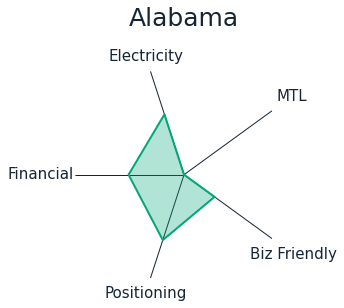

In [8]:
# number of variable
categories=list(df_scaled)[1:]
N = len(categories)

# Getting the relevant data points for state, dropping the state name
values = df_scaled.loc[0].drop('State').values.flatten().tolist()
values += values[:1]

# Determining angles for axis plot
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# The spider plot
ax = plt.subplot(111, polar=True)

# Plotting axis ticks and labels
plt.xticks(angles[:-1], categories, color='#152536', size=15, font = 'DejaVu Sans')

# Draw ylabels, already standardized from 0 to 1
ax.set_rlabel_position(0)
plt.yticks([0, 0.5, 1], [], color="#152536", size=12)
plt.ylim(0,1)

# Plot data
ax.plot(angles, values, linewidth=2, linestyle='solid', color = '#03A678')

# Fill plot with angles and values, coloring green
ax.fill(angles, values, 'b', alpha=0.3, facecolor = '#03A678')

# Adding title of graph
plt.title(df_scaled.iloc[0,0], size = 25, pad = 40, 
        font = 'Dejavu Sans', 
        color = '#152536')

# Reorienting the labels
ax.set_theta_offset(np.pi / 5)
XTICKS = ax.xaxis.get_major_ticks()
for tick in XTICKS[0:1]:
    tick.set_pad(18)
for tick in XTICKS[1:2]:
    tick.set_pad(9)
for tick in XTICKS[2:3]:
    tick.set_pad(28)
for tick in XTICKS[3:4]:
    tick.set_pad(9)   
for tick in XTICKS[4:5]:
    tick.set_pad(20)    

# Removing y ticks for cleaner look
ax.set_yticks([])

# Turning off grid
ax.yaxis.grid(False)
ax.xaxis.grid(False)

# Removing outside circle of spider plot
ax.spines["polar"].set_color("none")

# Formatting lines
ax.xaxis.grid(True, color='#152536', linestyle='-' , linewidth = 1)

plt.show()

### Same plot as above but using *For Loop* to efficiently save plots:

In [9]:
# number of variable
categories=list(df_scaled)[1:]
N = len(categories)

for x in range(50):
    # Getting the relevant data points for state, dropping the state name
    values = df_scaled.loc[x].drop('State').values.flatten().tolist()
    values += values[:1]

    # Determining angles for axis plot
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # The spider plot
    ax = plt.subplot(111, polar=True)

    # Plotting axis ticks and labels
    plt.xticks(angles[:-1], categories, color='#152536', size=15, font = 'DejaVu Sans')

    # Draw ylabels, already standardized from 0 to 1
    ax.set_rlabel_position(0)
    plt.yticks([0, 0.5, 1], [], color="#152536", size=12)
    plt.ylim(0,1)

    # Plot data
    ax.plot(angles, values, linewidth=2, linestyle='solid', color = '#03A678')

    # Fill plot with angles and values, coloring green
    ax.fill(angles, values, 'b', alpha=0.3, facecolor = '#03A678')

    # Adding title of graph
    plt.title(df_scaled.iloc[x,0], size = 25, pad = 40, 
              font = 'DejaVu Sans', 
              color = '#152536')

    # Reorienting the labels
    ax.set_theta_offset(np.pi / 5)
    XTICKS = ax.xaxis.get_major_ticks()
    for tick in XTICKS[0:1]:
        tick.set_pad(18)
    for tick in XTICKS[1:2]:
        tick.set_pad(9)
    for tick in XTICKS[2:3]:
        tick.set_pad(28)
    for tick in XTICKS[3:4]:
        tick.set_pad(9)   
    for tick in XTICKS[4:5]:
        tick.set_pad(20)    

    # Removing y ticks for cleaner look
    ax.set_yticks([])
    
    # Turning off grid
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)

    # Removing outside circle of spider plot
    ax.spines["polar"].set_color("none")
    
    # Formatting lines
    ax.xaxis.grid(True, color='#152536', linestyle='-' , linewidth = 1)

    # Saving each figure with respective state name with specifications
    # Commenting out code to avoid saving multiple times
    '''plt.savefig('original\\' + df_scaled.iloc[x,0]+'.png', dpi = 500, bbox_inches='tight')'''
    
    # Closing figure to reset for new state & plot
    plt.clf()

<Figure size 432x288 with 0 Axes>

## Transparent Plot

### 1 for Alabama:

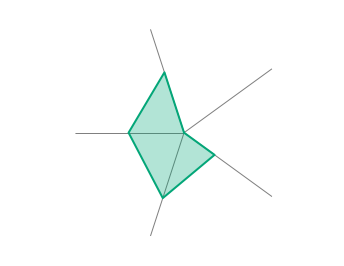

In [10]:
# number of variable
categories=list(df_scaled)[1:]
N = len(categories)

# Getting the relevant data points for state, dropping the state name
values = df_scaled.loc[0].drop('State').values.flatten().tolist()
values += values[:1]
values

# Determining angles for axis plot
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# The spider plot
ax = plt.subplot(111, polar=True)
 
# Plotting axis ticks and labels
plt.xticks(angles[:-1], categories, color='white', size=15, font = 'DejaVu Sans')

# Draw ylabels, already standardized from 0 to 1
ax.set_rlabel_position(0)
plt.yticks([0, 0.5, 1], [], color="white", size=12)
plt.ylim(0,1)
 
# Plot data
ax.plot(angles, values, linewidth=2, linestyle='solid', color = '#03A678')
 
# Fill plot with angles and values, coloring green
ax.fill(angles, values, 'b', alpha=0.3, facecolor = '#03A678')

# Reorienting the labels
ax.set_theta_offset(np.pi / 5)
XTICKS = ax.xaxis.get_major_ticks()
for tick in XTICKS[0:1]:
    tick.set_pad(18)
for tick in XTICKS[1:2]:
    tick.set_pad(9)
for tick in XTICKS[2:3]:
    tick.set_pad(28)
for tick in XTICKS[3:4]:
    tick.set_pad(9)   
for tick in XTICKS[4:5]:
    tick.set_pad(20)    

# Removing y ticks for cleaner look
ax.set_yticks([])

# Turning off grid
ax.yaxis.grid(False)
ax.xaxis.grid(False)

# Removing outside circle of spider plot
ax.spines["polar"].set_color("none")

# Formatting line
ax.xaxis.grid(True, color='gray', linestyle='-' , linewidth = 1)

plt.show()

*Not visible: labels, which are colored white*

### Same plot as above but using *For Loop* to efficiently save plots:

In [11]:
# number of variable
categories=list(df_scaled)[1:]
N = len(categories)

for x in range(50):
    # Getting the relevant data points for state, dropping the state name
    values = df_scaled.loc[x].drop('State').values.flatten().tolist()
    values += values[:1]

    # Determining angles for axis plot
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # The spider plot
    ax = plt.subplot(111, polar=True)

    # Plotting axis ticks and labels
    plt.xticks(angles[:-1], categories, color='white', size=15, font = 'DejaVu Sans')

    # Draw ylabels, already standardized from 0 to 1
    ax.set_rlabel_position(0)
    plt.yticks([0, 0.5, 1], [], color="white", size=12)
    plt.ylim(0,1)

    # Plot data
    ax.plot(angles, values, linewidth=2, linestyle='solid', color = '#03A678')

    # Fill plot with angles and values, coloring green
    ax.fill(angles, values, 'b', alpha=0.3, facecolor = '#03A678')

    # Reorienting the labels
    ax.set_theta_offset(np.pi / 5)
    XTICKS = ax.xaxis.get_major_ticks()
    for tick in XTICKS[0:1]:
        tick.set_pad(18)
    for tick in XTICKS[1:2]:
        tick.set_pad(9)
    for tick in XTICKS[2:3]:
        tick.set_pad(28)
    for tick in XTICKS[3:4]:
        tick.set_pad(9)   
    for tick in XTICKS[4:5]:
        tick.set_pad(20)    

    # Removing y ticks for cleaner look
    ax.set_yticks([])
    
    # Turning off grid
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)
    
    # Removing outside circle of spider plot
    ax.spines["polar"].set_color("none") 
    
    # Formatting lines
    ax.xaxis.grid(True, color='gray', linestyle='-' , linewidth = 1)

    # Saving each figure with respective state name with specifications
    # Commenting out code to avoid saving multiple times
    '''plt.savefig(df_scaled.iloc[x,0]+'_transparent.png', dpi = 500, 
                #bbox_inches='tight', transparent=True)'''
    
    # Closing figure to reset for new plot
    plt.clf()

<Figure size 432x288 with 0 Axes>